In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Be careful with variables of container data type

In [3]:
# Define NumPy array x1
x = np.array([5, 7, 9])

# Assign x to y
# In this time, instance remains common
y = x

# Confirm results
print(x)
print(y)

[5 7 9]
[5 7 9]


In [4]:
# problem!

# Now, change the value of a particular element of x
x[1] = -1

# Then, the y's value is also changed automatically.
print(x)
print(y)

[ 5 -1  9]
[ 5 -1  9]


In [5]:
# if you don't want to chenge y's value, use copy function
x = np.array([5, 7, 9])
y = x.copy()

# The y's value isn't changed by the change of x's value
x[1] = -1
print(x)
print(y)

[ 5 -1  9]
[5 7 9]


In [6]:
import torch

# x1: all values of shape=[5] are tensor of 1
x1 = torch.ones(5)

# Confirm result
print(x1)

# x2: Numpy generated from x1
x2 = x1.data.numpy()

# Confirm result
print(x2)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [7]:
# Problem!

# Change the value of x1
x1[1] = -1

# The value of x2 is automaically changed
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[ 1. -1.  1.  1.  1.]


In [8]:
# How to change safely

# x1: tensor
x1 = torch.ones(5)

# x2: Numpy copied from x1
x2 = x1.data.numpy().copy()

x1[1] = -1

# Confirm results
print(x1)
print(x2)

tensor([ 1., -1.,  1.,  1.,  1.])
[1. 1. 1. 1. 1.]


# Composite function and how to implement it by Python

In [9]:
# f(x) = 2x^2 + 2
def f(x):
    return (2 * x**2 + 2)

In [10]:
# Define x as Numpy array
# Range : [-2, 2] 
# Step : 0.25
x = np.arange(-2, 2.1, 0.25)
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [11]:
# Substitute the result of f(x) to y
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


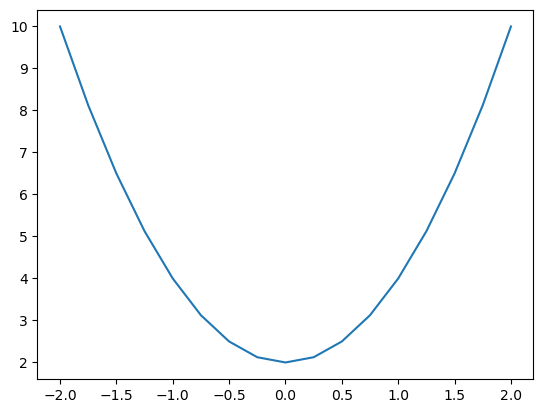

In [12]:
# Show the graph of (x, f(x))
plt.plot(x,y)
plt.show()

In [13]:
# Definition of three basic function
def f1(x):
    return(x**2)

def f2(x):
    return(x*2)

def f3(x):
    return(x+2)

# Create composite function
x1 = f1(x)
x2 = f2(x1)
y = f3(x2)

In [14]:
# Confirm value of composite function
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


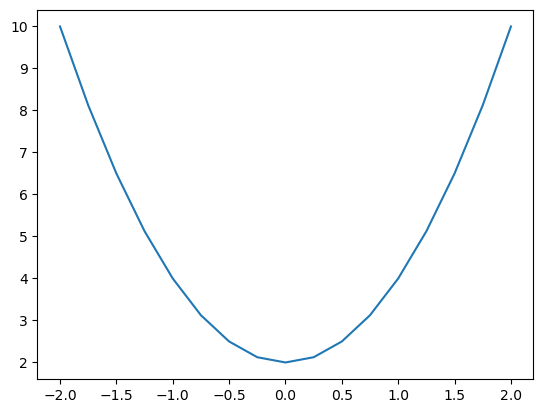

In [16]:
# Show the graph of composite function
plt.plot(x, y)
plt.show()